# Goal : Create a model to predict whether or not a customer will Churn

### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.


### The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
To explore this type of models and learn more about the subject.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratroy Data Analysis

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

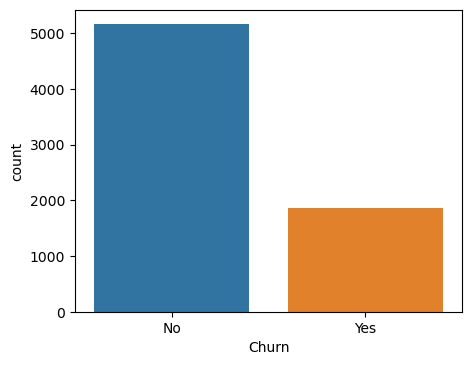

In [8]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(data=df,x='Churn')

### lets Explore the distribution of TotalCharges Between Churn categories with a box plot and Violin plot

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

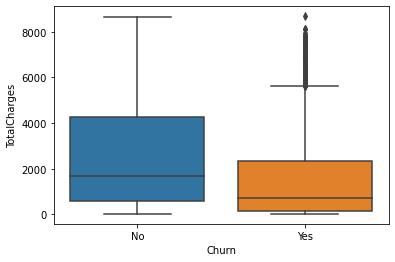

In [9]:
sns.boxplot(data=df,y='TotalCharges',x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

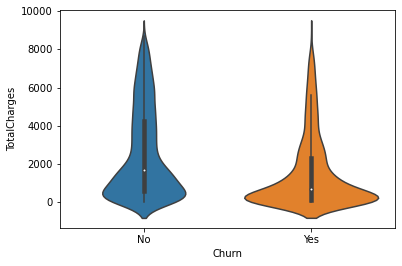

In [10]:
sns.violinplot(data=df,y='TotalCharges',x='Churn')

### Create a Boxplot showing the distribution of TotalCharges per Contract type,also add in a hue coloring based on th churn class

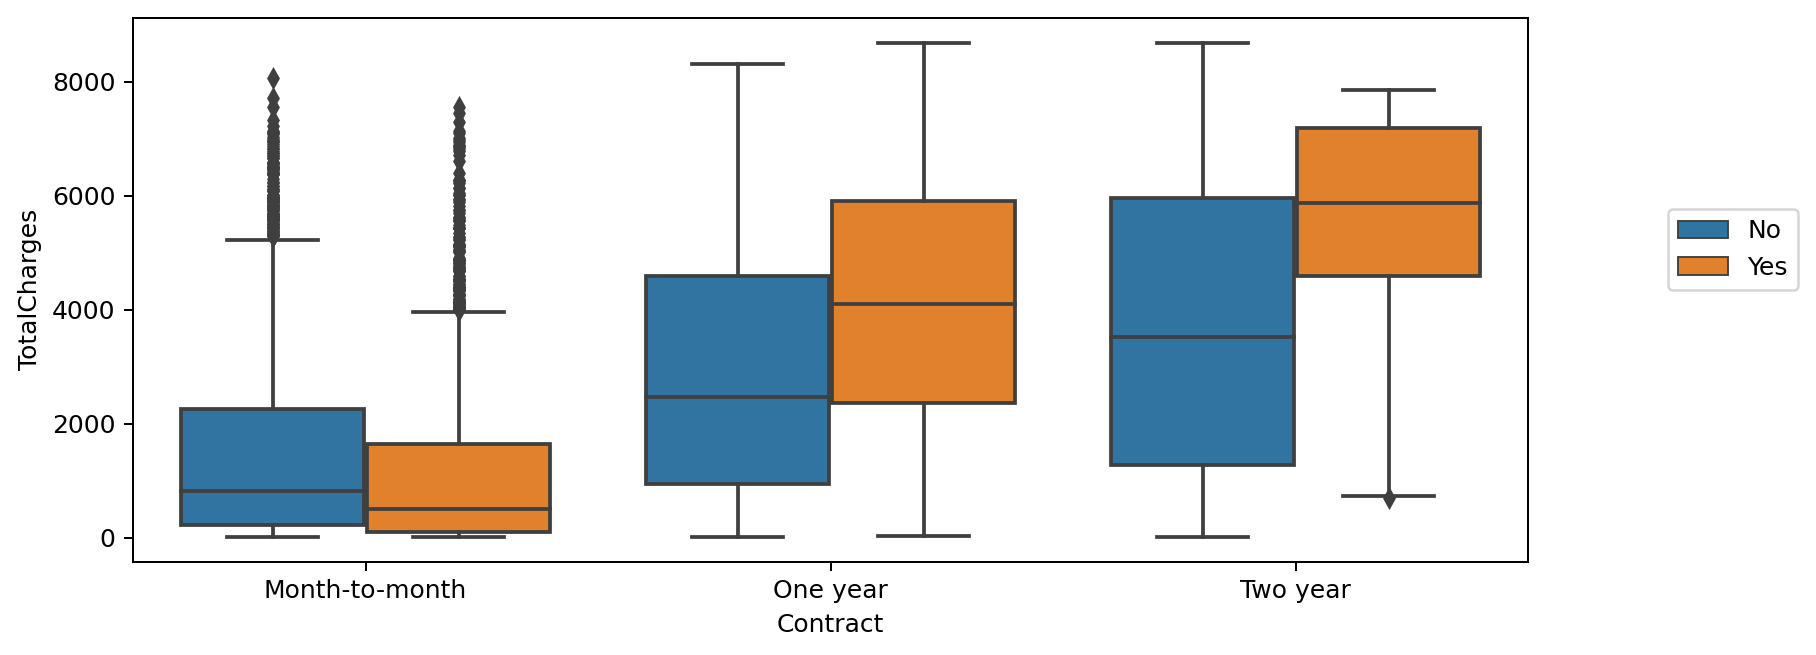

In [11]:
plt.figure(figsize=(10,4),dpi=180)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

#### Create a bar plot showing the coreelation of the following features to the class label keep in mind for the categorical features you need to convert them into dummy variables first as you can calculate correlation for numeric faetures
['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines',
        'OnlineBackup', 'DeviceProtection', 'TechSupport','InternetService',
        'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport','InternetService', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [14]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'InternetService', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [15]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [16]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtection_Yes                      -0.066193
MultipleLines_No                          -0.032654
MultipleLine

In [17]:
corr_yes_churn=corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [18]:
corr_yes_churn

Contract_Two year                         -0.301552
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtection_Yes                      -0.066193
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
PhoneService

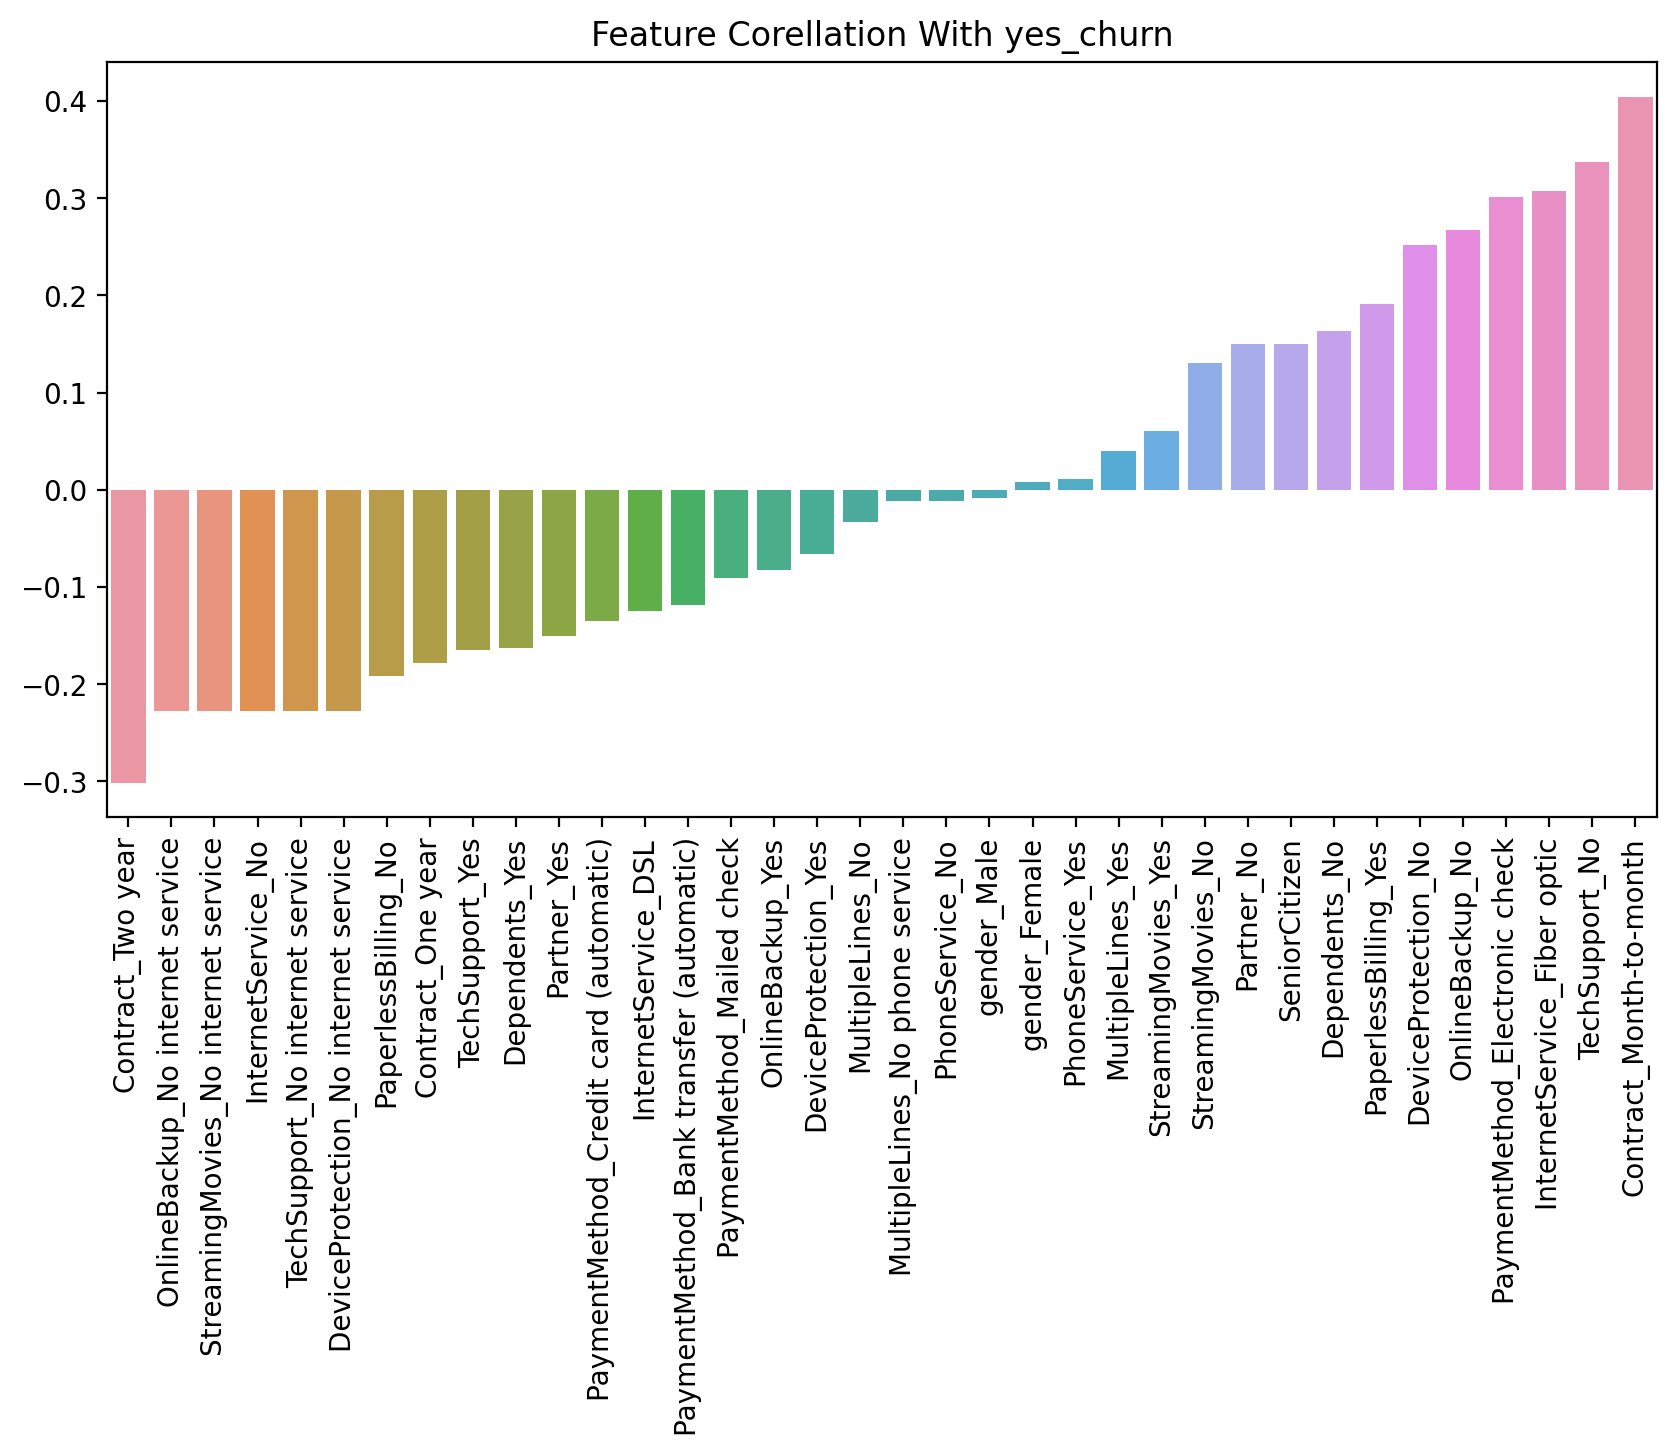

In [19]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Feature Corellation With yes_churn")
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.xticks(rotation=90);

# Churn Analysis

This section focuses on segmenting customers based on their 'tenure' column, which is the amount of months a customers was or has been a customer

what are the 3 contract types availble??

In [20]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

#### lets create a histogram displaying of "tenure" column which is the amount of months a customer was or has been on a customer

<AxesSubplot:xlabel='tenure', ylabel='Count'>

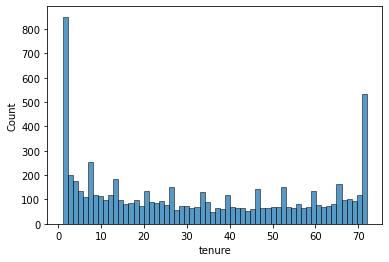

In [21]:
sns.histplot(data=df,x='tenure',bins=60)

#### Now use the seaborn documentation asa guide to create histogram separated by two additional features ,churn and contract

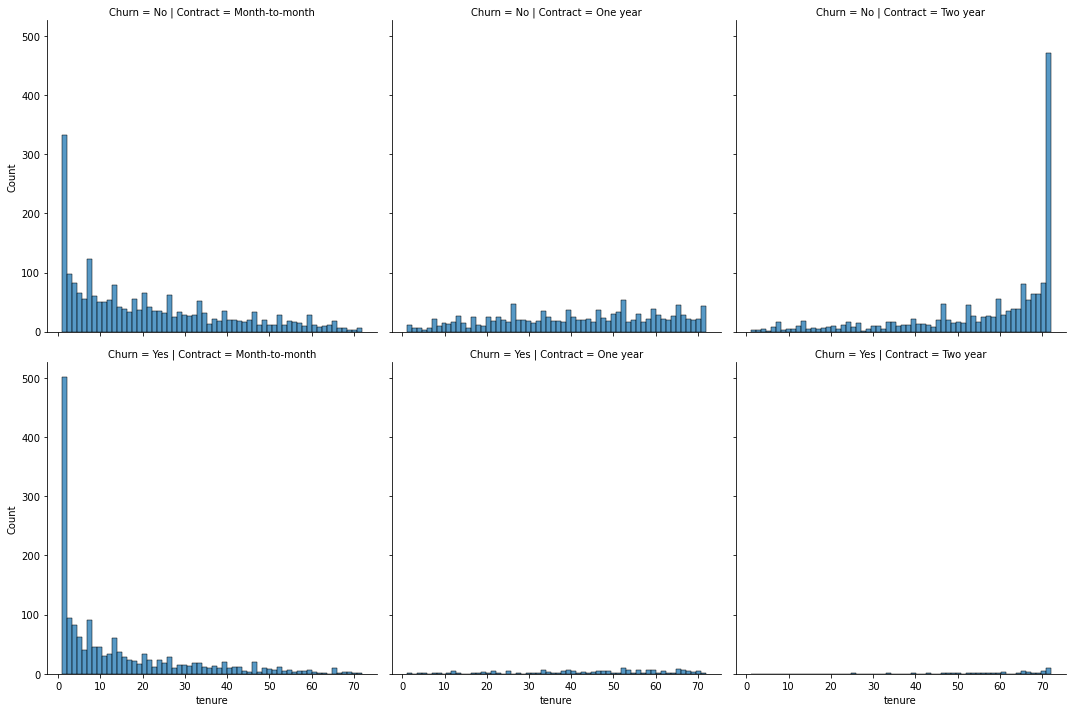

In [22]:
sns.displot(data=df,x='tenure',bins=60,col='Contract',row='Churn')

#### Display scatter plot for total charges versus Monthly charges and color hue by churn

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

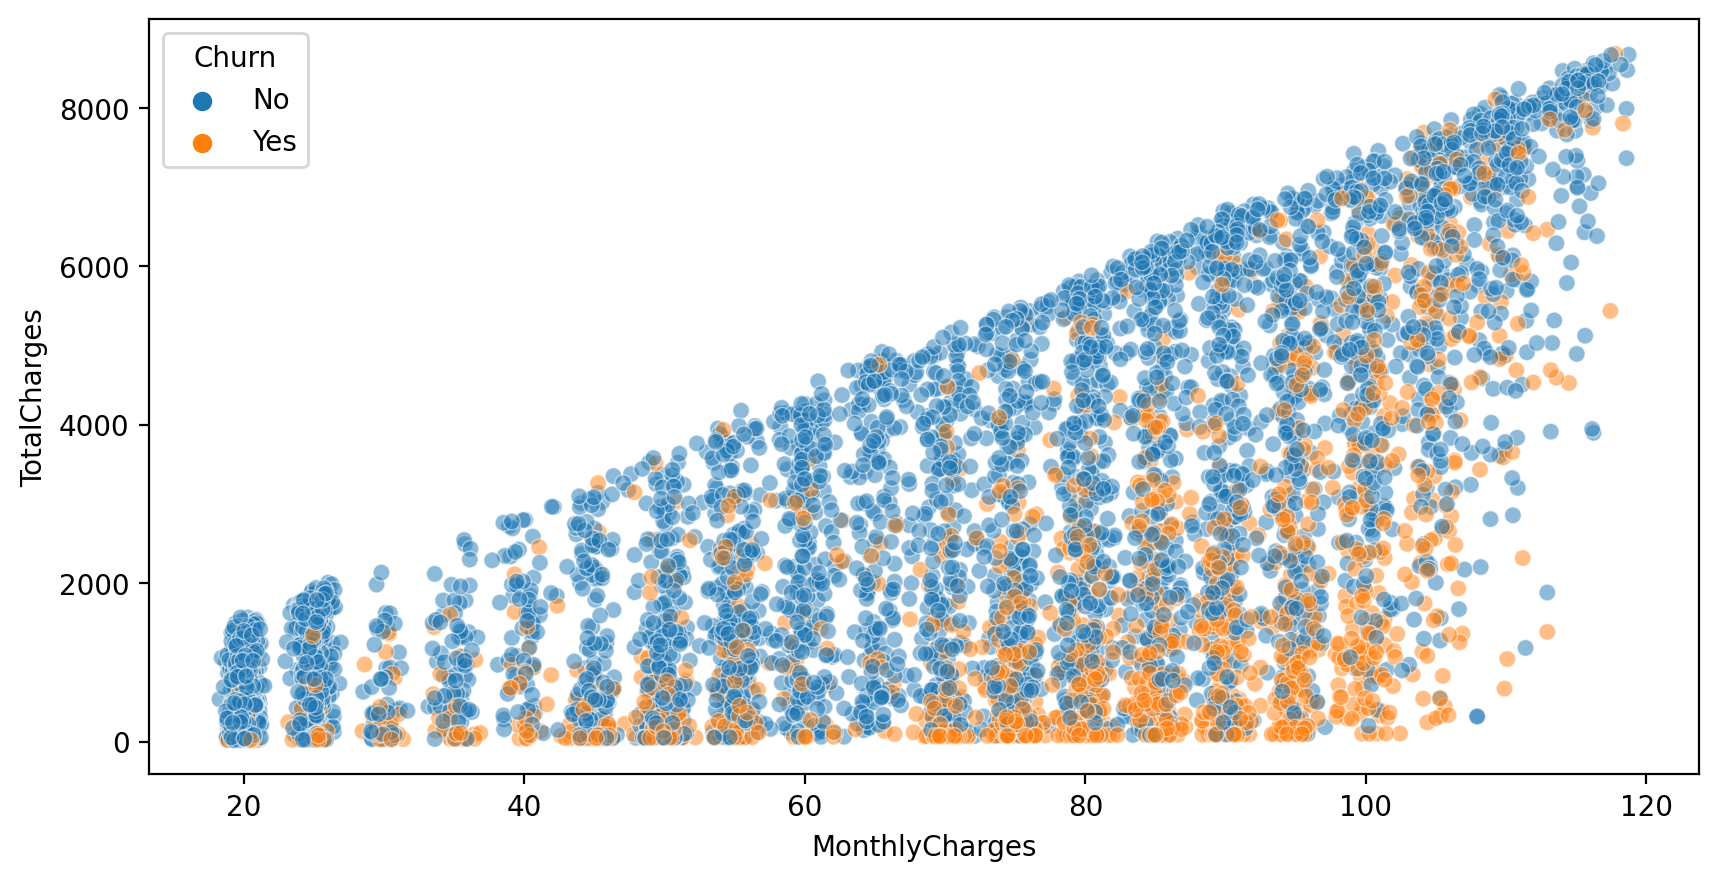

In [23]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5)

# Creating Cohorts based on Tenure
lets begin by trating each unique lenght, 1month,2month,3month....N months as its cohort.



#### Treating each unique tenure group as a cohort ,calculate the churn rate(percentage that had yes churn ) per chort. 

In [24]:
df.groupby(['Churn','tenure']).count().transpose()

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [25]:
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [26]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [27]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']

In [28]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [29]:
churn_rate=100*yes_churn/(no_churn+yes_churn)

In [30]:
churn_rate.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


In [31]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

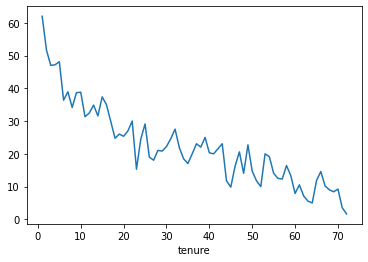

In [32]:
churn_rate.transpose()['customerID'].plot()

### Broader Cohort Groups
Based on the tenure column values,create a new column called Tenure Cohort that creates 4 seprate categories

0-12 Months

12-24 Months

24-48 Months

over 48 Months

In [33]:
def cohort(tenure):
    if tenure<13 :
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'over 48 Months'

In [34]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [35]:
df[['Tenure Cohort','tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


#### Display scatter plot for total charges versus Monthly charges and color hue by tenure

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

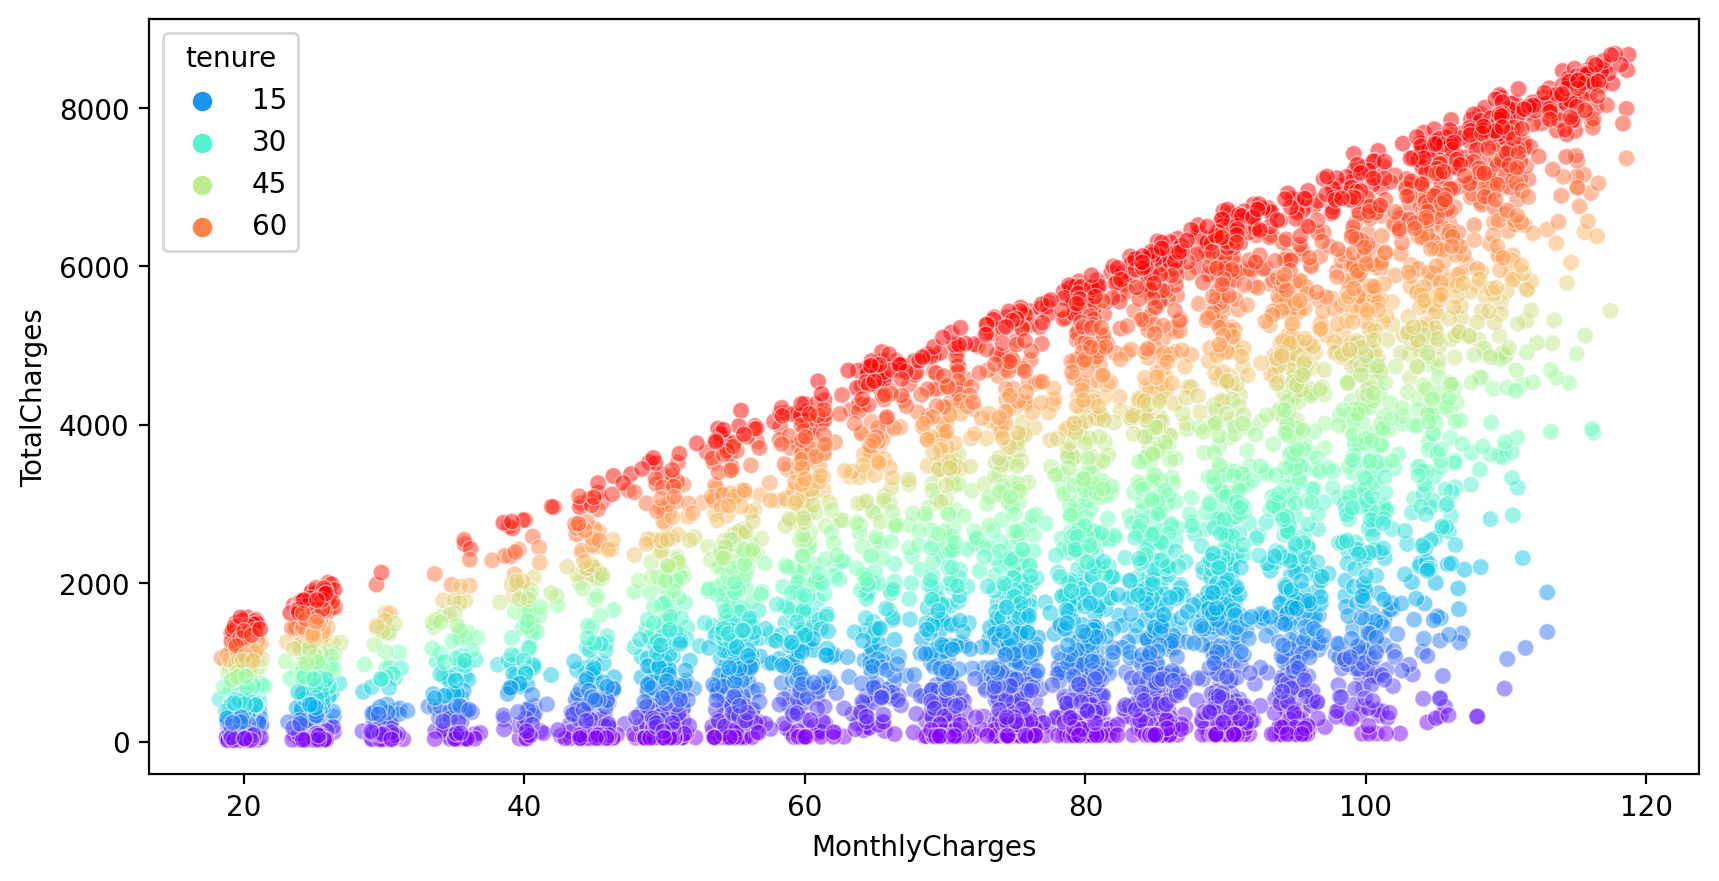

In [36]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='tenure',palette='rainbow',alpha=0.5)

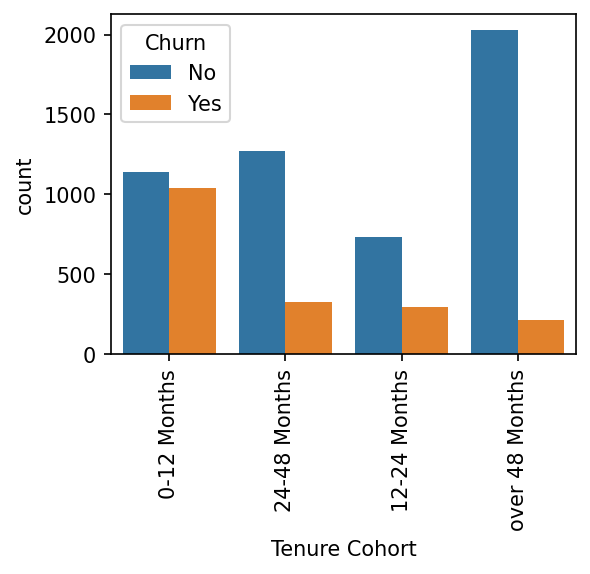

In [37]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')
plt.xticks(rotation=90);

#### create a grid of count plot showing counts per tenure cohort ,seprated out by conatract type and colored by churn hue

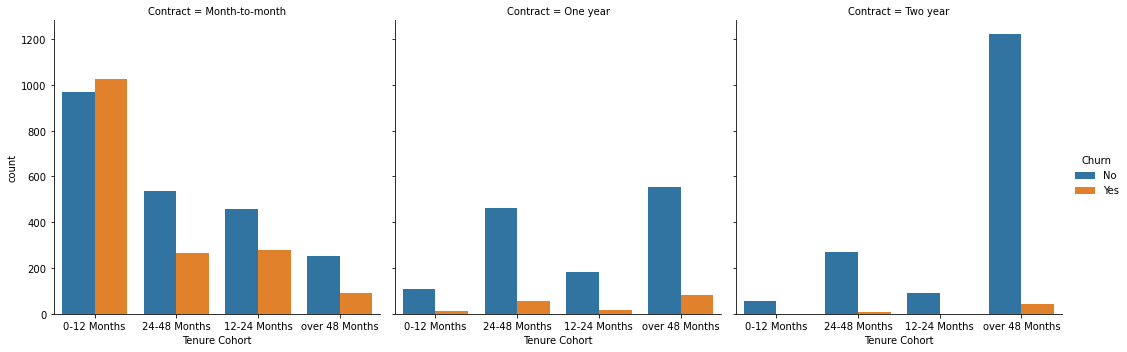

In [38]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract')

# Predictive Modeling

#### lets explore 4diffrent tree based methods : A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.

## Single Decision Tree 

#### Sperate out data into X and Y label.Create dummy Variables where necessary and note which features are not useful and should be drooped

In [39]:
X=df.drop(['customerID','Churn'],axis=1)

In [40]:
X=pd.get_dummies(X,drop_first=True)

In [41]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [42]:
y=df['Churn']

#### Perform train test split and test size is 10%  and randomstate is 101

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Descion Tree performance 
1.Train a single decision tree model (feel free to grid search for optional hyperparameters).

2.Evaluate performance metrics from decision tree including classification report and plotting a confusion matrix.

3.Calculate feature importance from the decision Tree.


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,plot_confusion_matrix

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.79      0.82       557
         Yes       0.38      0.49      0.43       147

    accuracy                           0.73       704
   macro avg       0.62      0.64      0.63       704
weighted avg       0.76      0.73      0.74       704



In [51]:
print(accuracy_score(y_test, y_pred))

0.7286931818181818


In [52]:
cm = confusion_matrix(y_test, y_pred)

In [53]:
cm

array([[441, 116],
       [ 75,  72]], dtype=int64)

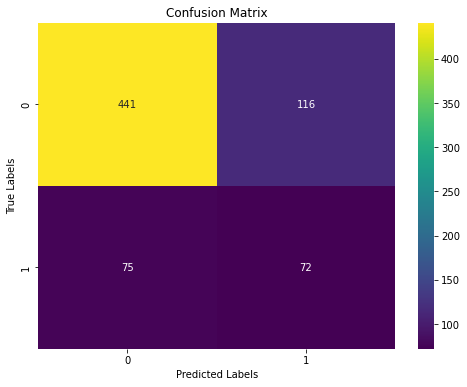

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


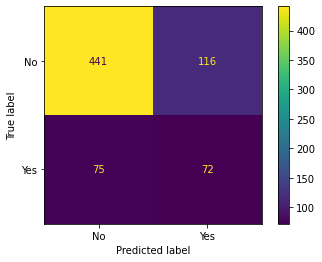

In [55]:
plot_confusion_matrix(dt,X_test,y_test)

In [56]:
dt.feature_importances_

array([0.01712262, 0.20872881, 0.19248862, 0.20924283, 0.01901287,
       0.01984063, 0.01511429, 0.00348918, 0.00096296, 0.01756847,
       0.1086629 , 0.00944872, 0.        , 0.0174302 , 0.        ,
       0.01729813, 0.        , 0.01344864, 0.00040123, 0.01435123,
       0.        , 0.00635661, 0.        , 0.00987024, 0.01734384,
       0.00984842, 0.02152027, 0.0109788 , 0.01946231, 0.01650113,
       0.00082387, 0.00148839, 0.00119376])

In [57]:
imp_feat = pd.DataFrame(data=dt.feature_importances_, 
                        index=X.columns, 
                        columns=['Feat Imp'])

In [58]:
imp_feat

,Feat Imp
SeniorCitizen,0.017123
tenure,0.208729
MonthlyCharges,0.192489
TotalCharges,0.209243
gender_Male,0.019013
Partner_Yes,0.019841
Dependents_Yes,0.015114
PhoneService_Yes,0.003489
MultipleLines_No phone service,0.000963
MultipleLines_Yes,0.017568


In [59]:
imp_feat=imp_feat.sort_values('Feat Imp')

In [60]:
imp_feat

,Feat Imp
DeviceProtection_No internet service,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_No internet service,0.000000
OnlineBackup_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
TechSupport_No internet service,0.000401
Tenure Cohort_12-24 Months,0.000824
MultipleLines_No phone service,0.000963
Tenure Cohort_over 48 Months,0.001194
Tenure Cohort_24-48 Months,0.001488


In [61]:
imp_feat=imp_feat[imp_feat['Feat Imp']>0]

In [62]:
imp_feat

,Feat Imp
TechSupport_No internet service,0.000401
Tenure Cohort_12-24 Months,0.000824
MultipleLines_No phone service,0.000963
Tenure Cohort_over 48 Months,0.001194
Tenure Cohort_24-48 Months,0.001488
PhoneService_Yes,0.003489
StreamingTV_Yes,0.006357
InternetService_No,0.009449
Contract_Two year,0.009848
StreamingMovies_Yes,0.009870


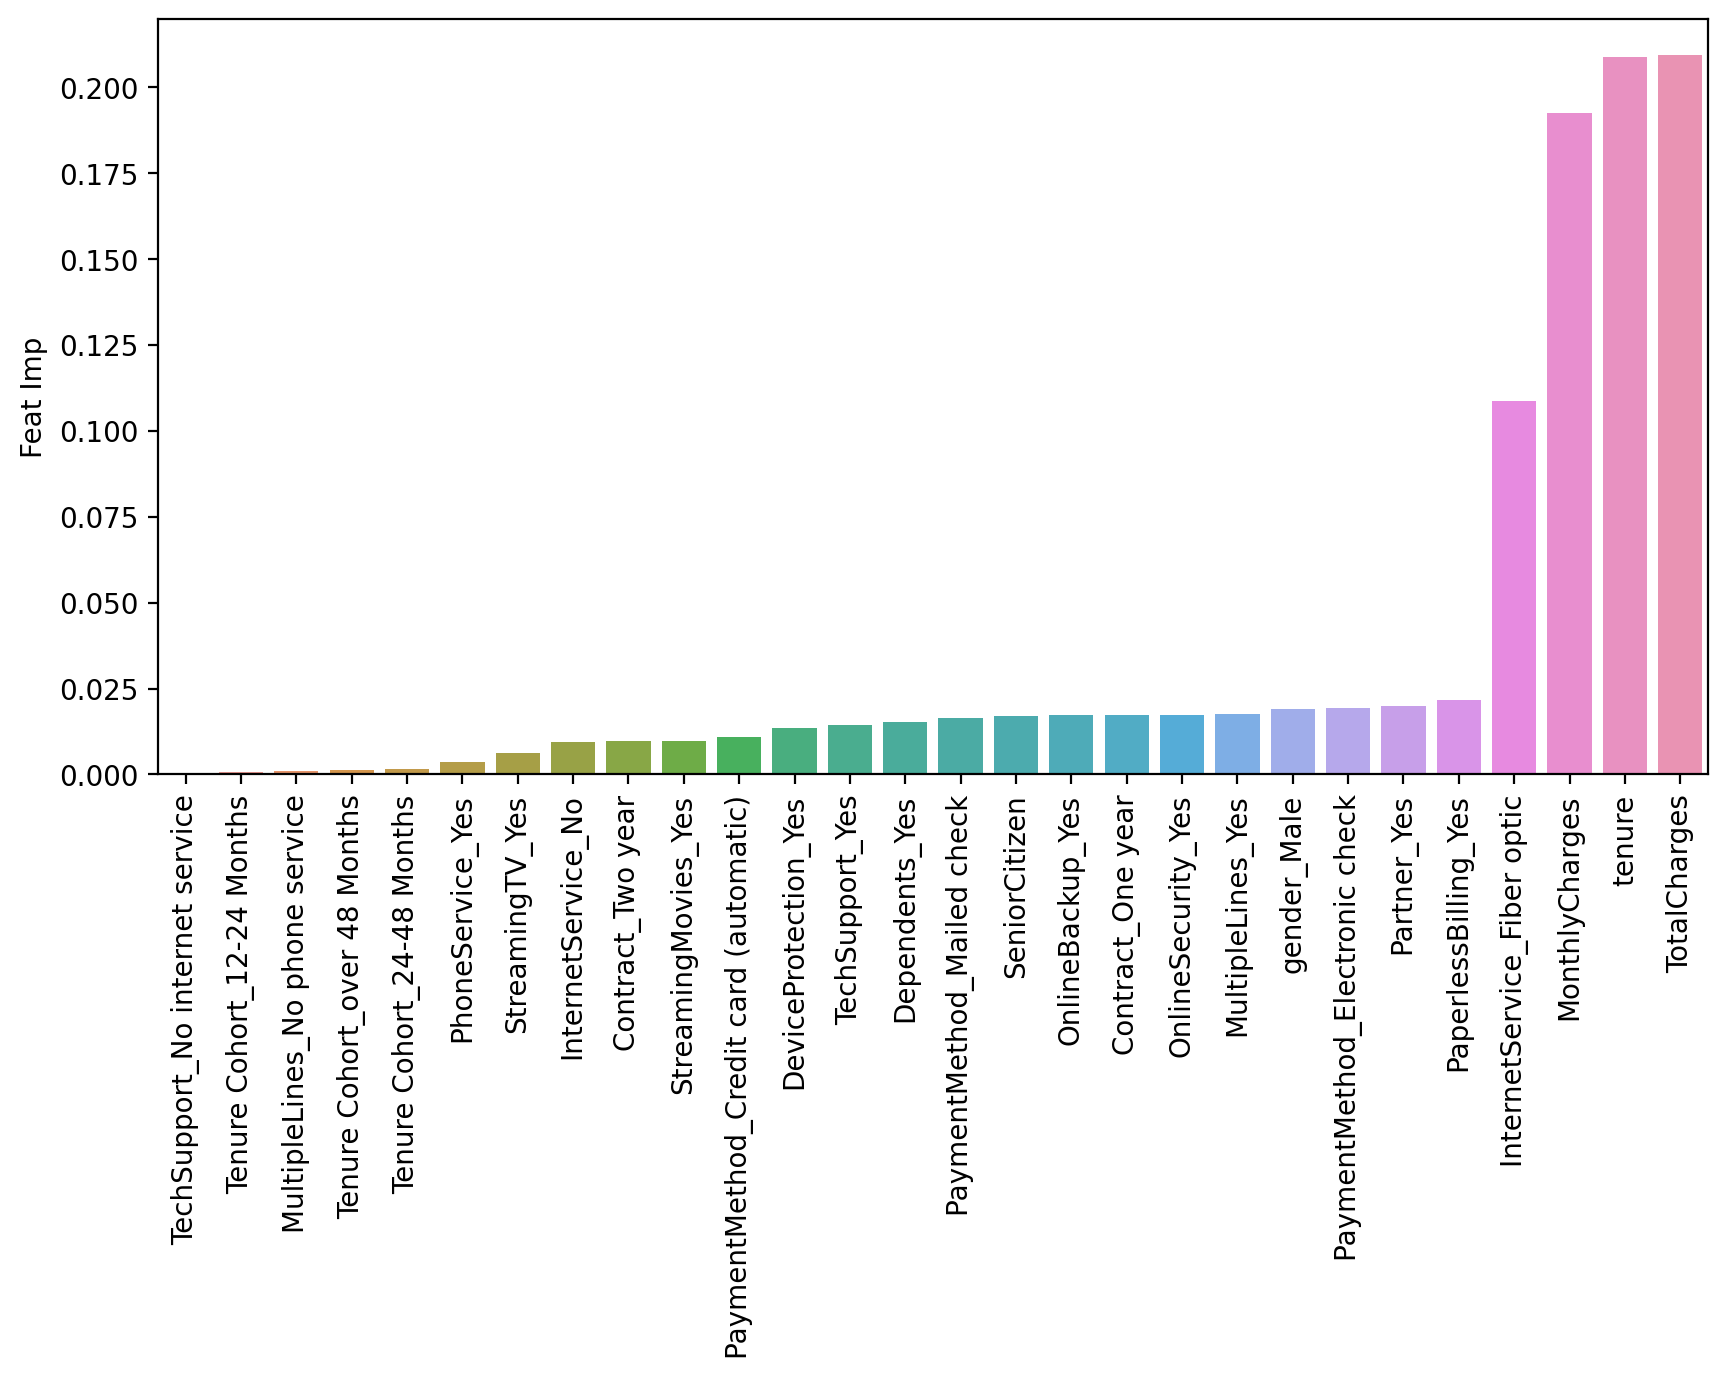

In [63]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Feat Imp')
plt.xticks(rotation=90);

In [64]:
from sklearn.tree import plot_tree

## Random Forest

#### Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,accuracy_score

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = rf.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



In [70]:
cm = confusion_matrix(y_test, y_pred)

In [71]:
cm

array([[490,  67],
       [ 80,  67]], dtype=int64)

C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


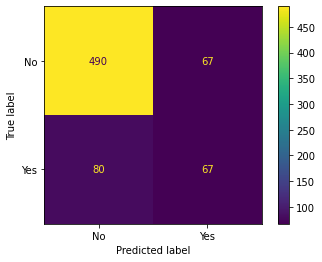

In [75]:
plot_confusion_matrix(rf,X_test,y_test)

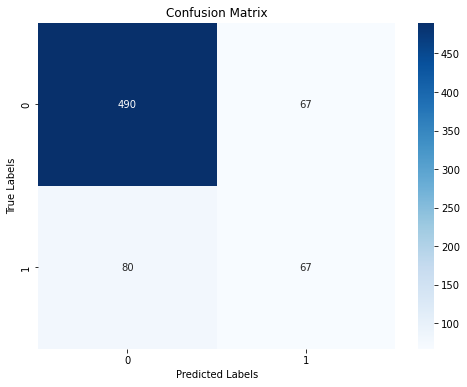

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Boosted Trees

### Use AdaBoost or Gadient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted resluts

# AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
adaboost = AdaBoostClassifier()

In [84]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [85]:
y_pred = adaboost.predict(X_test)


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [87]:
cm = confusion_matrix(y_test, y_pred)

In [88]:
cm

array([[504,  53],
       [ 67,  80]], dtype=int64)

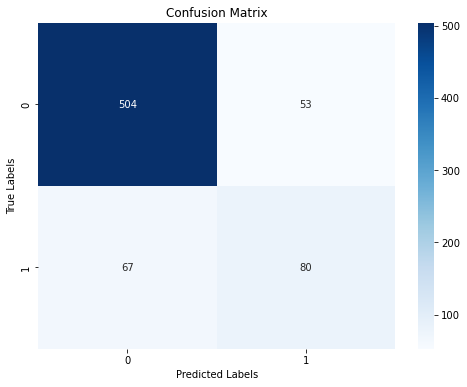

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


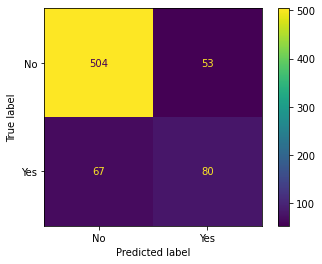

In [90]:
plot_confusion_matrix(adaboost,X_test,y_test)

# GradientBoosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
gradient_boosting = GradientBoostingClassifier()


In [93]:
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [94]:
y_pred = gradient_boosting.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [96]:
cm = confusion_matrix(y_test, y_pred)

In [97]:
cm

array([[503,  54],
       [ 74,  73]], dtype=int64)

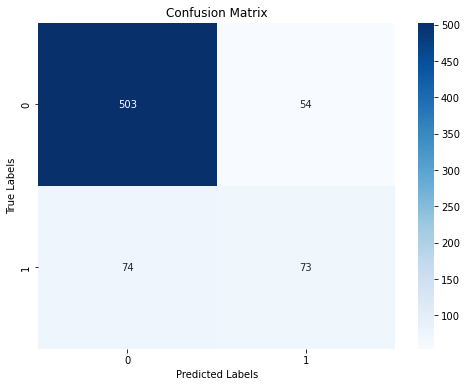

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


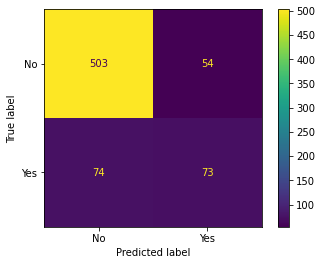

In [100]:
plot_confusion_matrix(gradient_boosting,X_test,y_test)